In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

Text(0,0.5,'Metabolic rate')

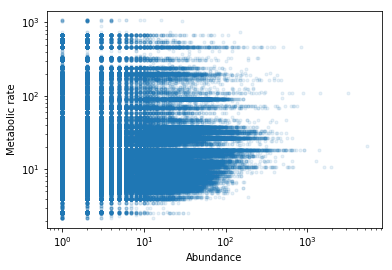

In [150]:
df     = pd.read_csv('data/bbs/bbs2011.csv')
df2    = pd.read_csv('data/bbs/speciesTableBody.csv', index_col='sppKey')
df2['rate'] = df2.mass**0.75
df3 = pd.merge(df, df2, left_on=['spp',], right_index=True)

plt.figure()
plt.loglog(df3.abund, df3.rate, ls='none', marker='.', alpha=0.1)
plt.xlabel('Abundance')
plt.ylabel('Metabolic rate')

AxesSubplot(0.125,0.125;0.775x0.755)
-0.10355188330599079


ValueError: endog and exog matrices are different sizes

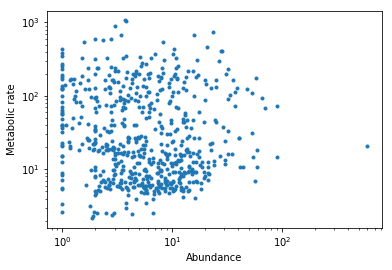

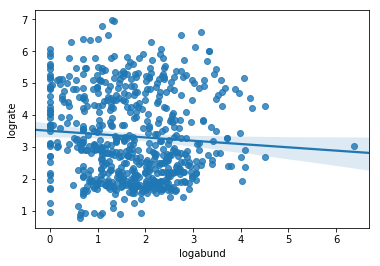

In [173]:
import seaborn as sns

counts = df.groupby('spp').aggregate('mean')
type(counts)

df4 = pd.merge(counts, df2, left_index=True, right_index=True)
plt.figure()
plt.loglog(df4.abund, df4.rate, ls='none', marker='.')
plt.xlabel('Abundance')
plt.ylabel('Metabolic rate')

df4['lograte'] = np.log(df4.rate)
df4['logabund'] = np.log(df4.abund)

plt.figure()
p=sns.regplot('logabund', 'lograte', data=df4)
print(p)
import scipy.stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
print(slope)
model = sm.OLS(sm.add_constant(df4.logabund.values), np.atleast_2d(df4.lograte.values))
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              1048.
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                   5.29e-135
Time:                        17:09:56   Log-Likelihood:                         -1685.7
No. Observations:                 616   AIC:                                      3373.
Df Residuals:                     615   BIC:                                      3378.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

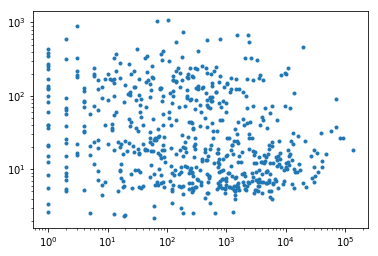

In [120]:
df     = pd.read_csv('data/bbs/bbs2011.csv')
counts = df.groupby('spp').aggregate('sum').sort_values('abund', ascending=False)
N      = len(counts)
abundances_tot = counts.abund.values

species_ix = counts.index.values

df2    = pd.read_csv('data/bbs/speciesTableBody.csv', index_col='sppKey')
df2['rate'] = df2.mass**0.75
metabolic_rates = df2.loc[species_ix].rate.values

# Plot in log log
plt.figure() ; plt.loglog(abundances_tot, metabolic_rates, ls='none', marker='.')
model = sm.OLS(np.log(abundances),np.log(metabolic_rates))
print(model.fit().summary())

ValueError: shapes (149587,2) and (149587,2) not aligned: 2 (dim 1) != 149587 (dim 0)

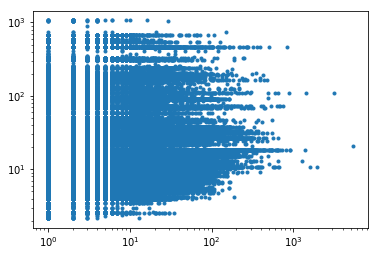

In [133]:
#print(df)
#print(df2)
df3 = pd.merge(df, df2, left_on=['spp',], right_on=['sppKey'])

plt.figure() ; plt.loglog(df3.abund, df3.rate, ls='none', marker='.')

X = sm.add_constant(np.log(df3.abund.values))
Y = np.atleast_2d(np.log(df3.rate.values))
#print(X,Y)
res = sm.OLS(X,Y).fit()
print(res.summary())

array([4.84500000e+01, 7.99500000e+01, 8.05000000e+01, 1.26500000e+02,
       3.99700000e+02, 1.05900000e+02, 4.13500000e+01, 2.40500000e+01,
       3.02000000e+01, 9.77000000e+01, 1.91000000e+01, 4.25500000e+01,
       1.64000000e+01, 2.42000000e+01, 1.27500000e+01, 4.84500000e+01,
       1.47000000e+01, 3.83500000e+01, 1.01000000e+01, 7.16500000e+01,
       3.56400000e+03, 1.21500000e+01, 2.11500000e+01, 2.68500000e+01,
       8.79000000e+01, 1.93000000e+01, 1.95000000e+01, 5.18500000e+02,
       9.80000000e+00, 2.21000000e+01, 6.26500000e+01, 9.65500000e+01,
       3.23500000e+01, 1.14500000e+01, 7.04500000e+01, 2.80500000e+02,
       4.05000000e+01, 3.76500000e+01, 2.57500000e+01, 1.50750000e+03,
       4.85000000e+01, 2.98000000e+01, 2.17500000e+01, 1.16150000e+03,
       2.79000000e+01, 2.35000000e+01, 3.07500000e+02, 1.20055000e+03,
       2.12000000e+01, 1.29500000e+01, 1.17000000e+01, 1.08750000e+03,
       2.36000000e+01, 3.35000000e+01, 4.22000000e+01, 2.73100000e+01,
      

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                          1.066e+04
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                        0.00
Time:                        17:02:17   Log-Likelihood:                         -1096.4
No. Observations:                 616   AIC:                                      2195.
Df Residuals:                     615   BIC:                                      2199.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

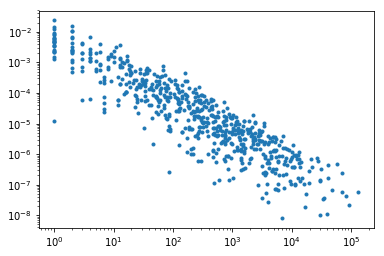

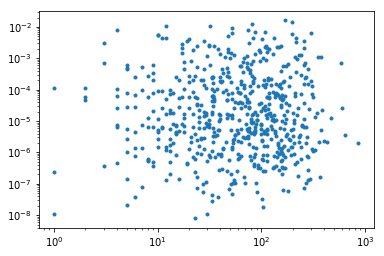

In [86]:
# Draw metabolic rates according to exponential distribution
beta = 120.
metabolic_rates = np.array([np.random.exponential(1/(beta*x)) for x in abundances])

# Print coefficient
model = sm.OLS(np.log(abundances),np.log(metabolic_rates))
print(model.fit().summary())

# Plot in log log
plt.figure() ; plt.loglog(abundances, metabolic_rates, ls='none', marker='.')


# Draw plot counts according to negative binomial distribution
plt.figure()
samples = np.array([np.random.negative_binomial(1, 1e-2) for x in abundances])
metabolic_rates2 = metabolic_rates[samples > 0]
samples = samples[samples > 0]
plt.loglog(samples, metabolic_rates2, ls='none', marker='.')
model = sm.OLS(np.log(samples),np.log(metabolic_rates2))
print(model.fit().summary())
#X = np.log(samples)
#model = sm.OLS(np.log(samples),X)
#print(model.fit().summary())


In [35]:
abundances, params0, params1 = [], [], []

#plt.figure()
for spp, abund in counts[0:50].iterrows():
    samp = df[df.spp == spp].abund.values
    loglike_method = 'nb2'
    res  = sm.NegativeBinomial(samp, np.ones_like(samp), loglike_method=loglike_method).fit(disp=0)
    
    mu   = np.exp(res.params[0])
    alpha = res.params[1]

    Q = 1 if loglike_method == 'nb1' else 0
    size = 1. / alpha * mu**Q
    prob = size / (size + mu)

    abundances.append(int(abund))
    params0.append(size)
    params1.append(prob)
    print(size, prob)
    
    # np.random.negative_binomial(size, prob)

#beta = 1e-4
#samples = [np.random.negative_binomial(size, prob) for x in abundances]
#plt.loglog(samples, abundances, ls='none', marker='o')

0.629068610900215 0.010477551920031572
1.2381628198212633 0.029573214163582783
0.7513970828530541 0.01806995021998396
1.3134218006040406 0.043084864178450276
1.446704515579092 0.04294640408798891
0.773382601734771 0.0231689993407469
1.4441933653657721 0.04247516690699892
0.5353927387907116 0.012690327225889678
0.746935579523578 0.02993579853893796
0.6748225936700907 0.012482381801715556
1.1534291318395924 0.06483469922332152
0.9471264266561795 0.05704659209102116
0.8797444154007492 0.04244793709369707
1.237102345121304 0.06148617624103529
1.4888286143368386 0.08759383532758848
1.0864582867321764 0.045419420667844844
1.2117120281788822 0.05791802219756474
0.7010241286955005 0.02487371582562102
1.255869995989955 0.09501128645430768
1.5451527846413637 0.11244197821878625
0.6389165589354245 0.029821168812226746
1.422308044065754 0.10722057561690092
1.6130190286217791 0.09574097336762773
0.6943392041539405 0.022614586239436713
0.9481830377414221 0.06287804286332614
1.1799130238825322 0.0678

In [44]:
abundances, params0, params1 = [], [], []
for spp, abund in counts[0:250].iterrows():
    species_df = df[df.spp == spp]
    #plt.figure()
    #species_df.abund.hist(bins=100)
    samp = np.array( species_df.abund.tolist() )
    #print(samp)
    loglike_method = 'nb2'
    res = sm.GeneralizedPoisson(samp, np.ones_like(samp), loglike_method=loglike_method).fit(disp=0)
    
    mu = res.predict()   # use if not constant
    mu = np.exp(res.params[0])
    alpha = res.params[1]

    if loglike_method == 'nb1':
        Q = 1
    elif loglike_method == 'nb2':    
        Q = 0

    size = 1. / alpha * mu**Q
    prob = size / (size + mu)


    abundances.append(int(abund))
    params0.append(size)
    params1.append(prob)
    print(size, prob)
    # asdf
    #print(fit.params)
    #asfdsadf
    #plt.title(spp)
    #break
    #.hist()
    #braek

0.07243355821158169 0.0012176909930573326
0.1651747385913604 0.0040489196141131
0.10906147486641284 0.002663881895841688
0.217492402956194 0.007400565263859171
0.21517101750110545 0.006629871616150766
0.13011280942429887 0.00397450829203447
0.21614886263925864 0.006595360268169367
0.08136002344511349 0.001949451967167589
0.15614696376076426 0.006409785014952514
0.08085360181614387 0.0015120609317981243
0.2841318022899614 0.016791602088252332
0.25566235901983053 0.01606799148347022
0.19683764116595695 0.00982114393114913
0.2721643300893945 0.014208400916597244
0.3651908972618976 0.023006542294906458
0.21436867108386523 0.009300746447449217
0.2599918609794548 0.013019405694857333
0.13390568269199338 0.004848771073399552
0.3784549019415781 0.0306672188358013
0.4490095201699695 0.03550696380464924
0.15140978040615485 0.007231228963498065
0.4258058603478024 0.034706558997360394
0.39430259912433907 0.025228770536101654
0.1216092509314731 0.004036162800223746
0.2718430197908606 0.018873896471

/usr/local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/usr/local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1.0139814413795627 0.1778327723412238
0.24390327823332966 0.0199347733812412
0.30269923464019666 0.027029802877307423
0.6249394299087683 0.09741342420260288
0.3079042031199573 0.03203965288093179
14.571682942428891 0.8830897071085646
0.27118527284688493 0.02208226525726089
0.5795114465687976 0.08905433444418273
0.31380792510910505 0.03753866968437915
0.2937293340973406 0.03143099949991868
3.4157373241680955 0.5820697952455134
2.1000130966290076 0.4048456825582117
2.0504407155482327 0.41575943526305625
1.215939571769608 0.24063383899542265
0.6345753015652309 0.09145155783903146
0.06086990942657968 0.0016338886761989872
0.9646182226463613 0.17902608288808086
0.2361514149744134 0.01480127644395618
0.14653003239576404 0.006784521503321593
0.2318318867484161 0.017263019782078257
0.42224965314108054 0.04300491852781761
0.11862883757598962 0.0058054798056831666
0.3107566234586716 0.02847072402037917
0.7985769025422148 0.1482983306439837
1.2911105381994699 0.2078314687538318
-0.909614183530767

/usr/local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/usr/local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.36863413202998185 0.03340535268099393
0.6353935858158636 0.10199734999406868
0.4825165525906852 0.07994693839027843
2.438177935379766 0.4758142368109073
0.25113052877850073 0.02541388268970447
1.631954008191651 0.3525867539921232
2.0127112663426443 0.40833249820915435
2.433262105051409 0.45207643000626513
0.2860112572902446 0.018170369313543863
0.8141857668187458 0.12186044179797786
1.1039268168348333 0.221953692963829
0.8675237988446964 0.13726157412969622
0.25283859398624803 0.01758797075742663
0.16260358236809977 0.011752948651222755
0.10659211677474162 0.0018806338679904853
0.6225806782981194 0.07669313953050587
0.5221818083024363 0.07835990802272949
2.619523483647365 0.4868016754291575
0.6689774497442063 0.09685982016542205
0.34467752049139994 0.03552382176589709
0.3157917596270225 0.023225938317328377
0.3441221198013523 0.03138698859312328
0.2622635346363788 0.02013542389545124
0.35526521807340633 0.03831615830255521
0.5745962184210447 0.08181788355233809
0.367029749225276 0.02

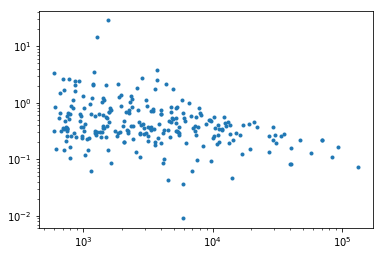

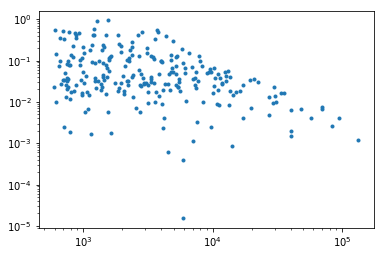

In [46]:
plt.figure()
#plt.scatter(abundances, params0)
plt.loglog(abundances, params0, ls='none', marker='.')
plt.figure()
#plt.scatter(abundances, params1)
plt.loglog(abundances, params1, ls='none', marker='.')